h 0.25


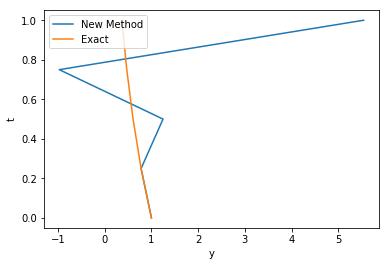

h 0.125


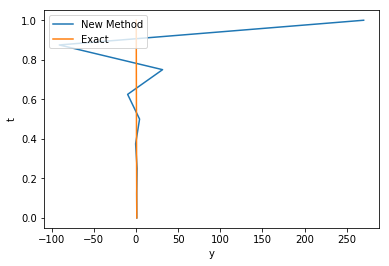

h 0.0625


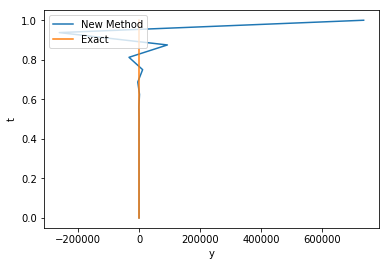

h 0.03125


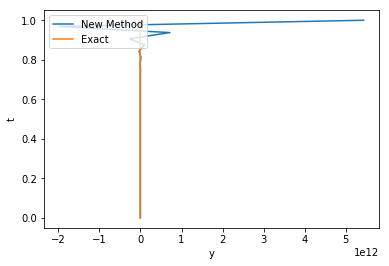

h 0.015625


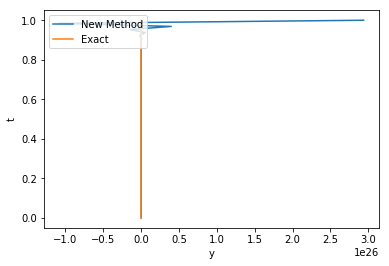

In [2]:
#Exercise of Numerical Differential Equations - Federal University of Minas Gerais
import numpy as np
import matplotlib.pyplot as plt

def f(y, t):
    return (-y)

def exact_sol(t):
    return (1/np.exp(t))
    
y0 = 1.0

# derivada de y
def dy(y,t):
    return (-1)

#derivada segunda de y
def dyy(y,t):
    return (0)

def Taylor(f, y0, T, n):
    """Solve y'=f(t,y), y(0)=y0, with n steps until t=T."""
    t = np.zeros(n+1)
    y = np.zeros(n+1)  # y[k] is the solution at time t[k]
    
    y[0] = y0
    t[0] = 0 #t0
    dt = T/float(n)
    print('h',dt)
    
    for k in range(n):
        t[k+1] = t[k] + dt  
        fk = f(y[k],t[k]) # f em t(k), y(k)
        dfk = dy(y[k],t[k]) # dy de f em t(k), y(k)
        ddfk = dyy(y[k],t[k]) # dyy de f em t(k), y(k)
        t1 = dt * fk
        t2 = ((dt**2)/2) * dfk * fk
        t3 = ((dt**3)/6) * ((ddfk * (fk**2)) + ((dfk**2) * fk))
        y[k+1] = y[k] + t1 + t2 + t3    
    return y, t

def new_method(f, y0, T, n, j = 3):
    t = np.zeros(n+1)
    y = np.zeros(n+1)  # y[k] is the solution at time t[k]
    
    #y[0] = y0
    t[0] = 0 #t0
    dt = T/float(n)
    y[0:j] = y0[0:j]
    
    for j in range(j):
        t[j+1] = t[j] + dt
        
    for k in range(j-1, n):
        t[k+1] = t[k] + dt
        y[k+1] = (-1.5)*y[k] + 3.0*y[k-1] -(0.5)*y[k-2] + 3.0*dt*f(y[k], t[k])
        
    return y, t 

for j in range(1,6):
    n = 2**(j+1)
    y1, t = Taylor(f, y0, 1, n)
    temp = y, t = new_method(f, y1, 1, n)
    yexact = exact_sol(t)

    plt.plot(temp[0], temp[1])
    #plt.plot(exact_sol(Kutta4[1]), Kutta4[1])
    plt.plot(exact_sol(temp[1]), temp[1])

    plt.legend(['New Method', 'Exact'], loc = 2)
    plt.xlabel('y')
    plt.ylabel('t')
    plt.show()